In [40]:
!python3 setup.py install --user

running install
running bdist_egg
running egg_info
writing bregclus.egg-info\PKG-INFO
writing dependency_links to bregclus.egg-info\dependency_links.txt
writing top-level names to bregclus.egg-info\top_level.txt
reading manifest file 'bregclus.egg-info\SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'bregclus.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\lib
creating build\lib\bregclus
copying bregclus\divergences.py -> build\lib\bregclus
copying bregclus\models.py -> build\lib\bregclus

zip_safe flag not set; analyzing archive contents...



copying bregclus\__init__.py -> build\lib\bregclus
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\bregclus
copying build\lib\bregclus\divergences.py -> build\bdist.win-amd64\egg\bregclus
copying build\lib\bregclus\models.py -> build\bdist.win-amd64\egg\bregclus
copying build\lib\bregclus\__init__.py -> build\bdist.win-amd64\egg\bregclus
byte-compiling build\bdist.win-amd64\egg\bregclus\divergences.py to divergences.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\bregclus\models.py to models.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\bregclus\__init__.py to __init__.cpython-39.pyc
creating build\bdist.win-amd64\egg\EGG-INFO
copying bregclus.egg-info\PKG-INFO -> build\bdist.win-amd64\egg\EGG-INFO
copying bregclus.egg-info\SOURCES.txt -> build\bdist.win-amd64\egg\EGG-INFO
copying bregclus.egg-info\dependency_links.txt -> build\bdist.win-amd64\egg\EGG-INFO
copying bregclus.egg-info\top_level.txt -> build\bdist.win-amd64\egg\EGG-INFO
creating 'di

In [42]:
%load_ext autoreload
%autoreload 2

In [43]:
directory = "./Logs/"
save_path = "./Saved/"

In [44]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [45]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [46]:
from bregclus.models import BregmanHard
from bregclus.divergences import euclidean
import numpy as np

In [64]:
X = get_features(logs, 2, 70)

labels_ = log_labels
bhc = BregmanHard(n_clusters=10, divergence=euclidean)
X= get_features(logs, 2, 70)
X=X.toarray()
idxs = np.where(np.all(X == 0, axis=1))
X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)
bhc.fit(X)

BregmanHard(n_clusters=10)

In [65]:
y_pred = bhc.predict(X)

In [66]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

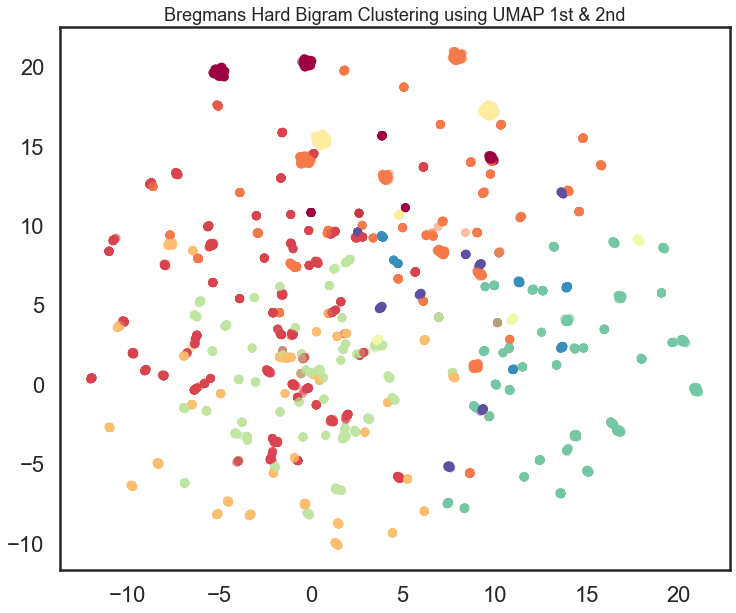

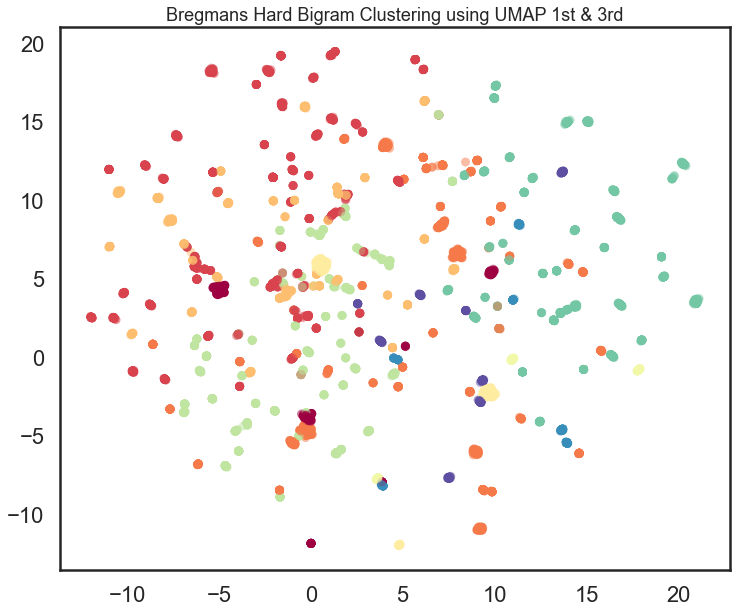

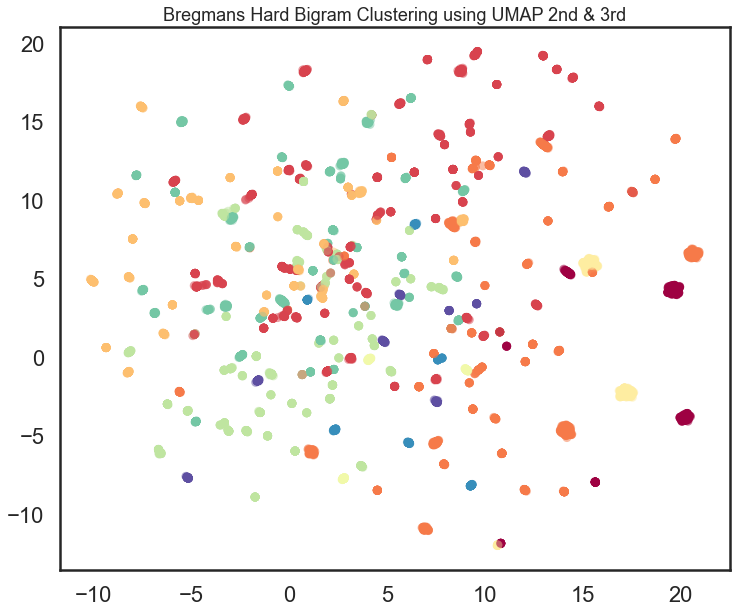

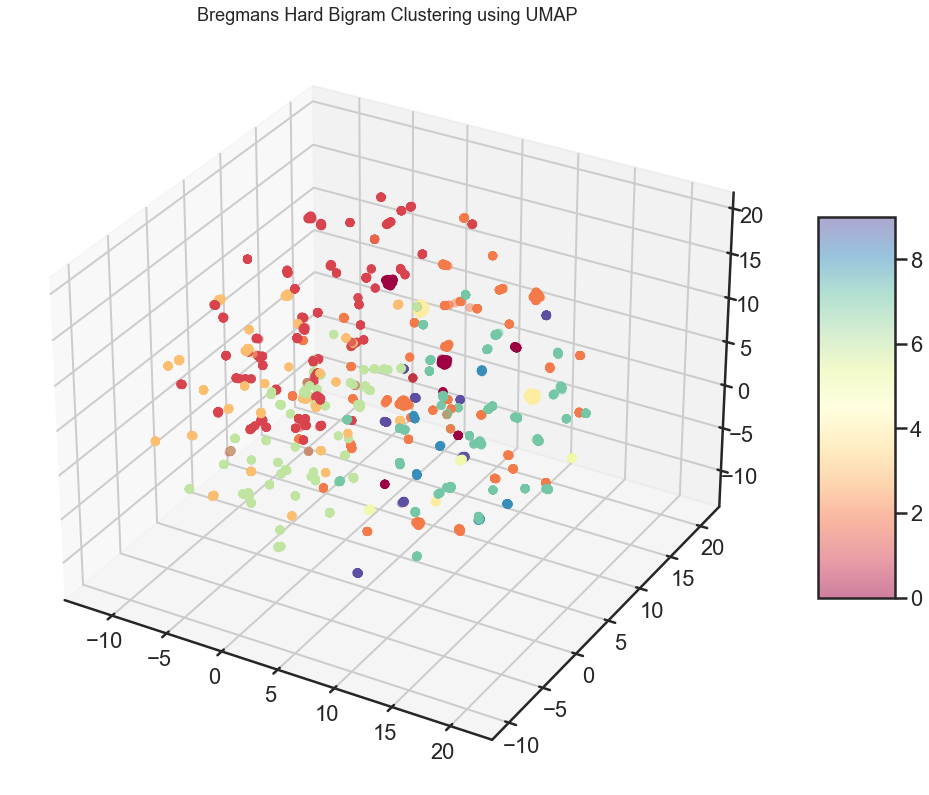

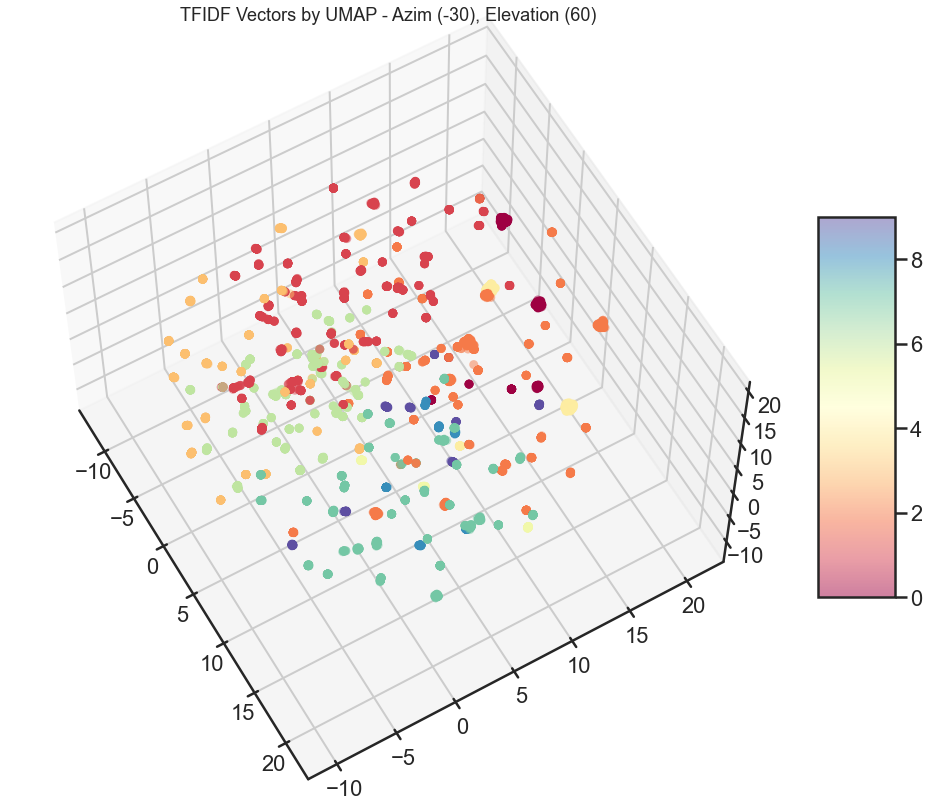

In [67]:
plot_clusters("Bregmans Hard Bigram Clustering using UMAP", X, y_pred)

In [68]:
results = evaluate_clustering('Bregmans Hard Bigram Clustering', X, labels_, y_pred)
print(results)

['Bregmans Hard Bigram Clustering', '0.53', '0.15', '0.24', '0.07', '0.24', '0.35']


In [69]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [70]:
bhc.fit(X)

BregmanHard(n_clusters=10)

In [71]:
y_pred = bhc.predict(X)

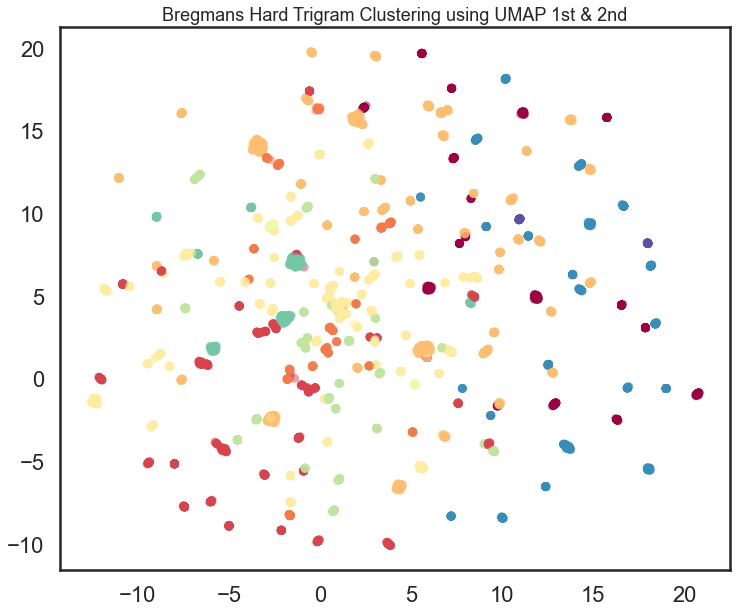

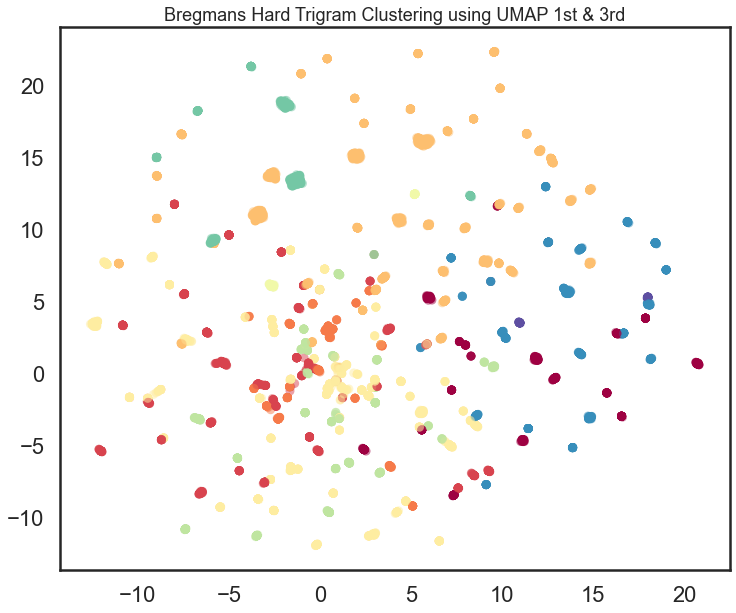

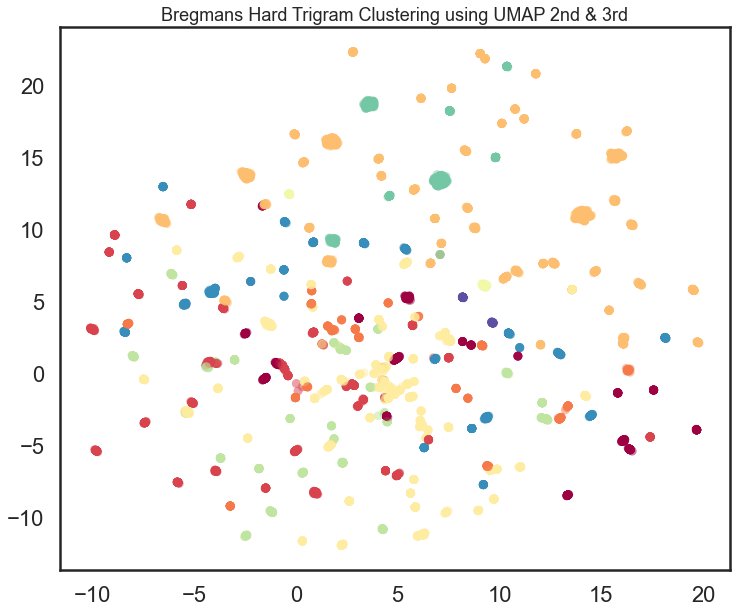

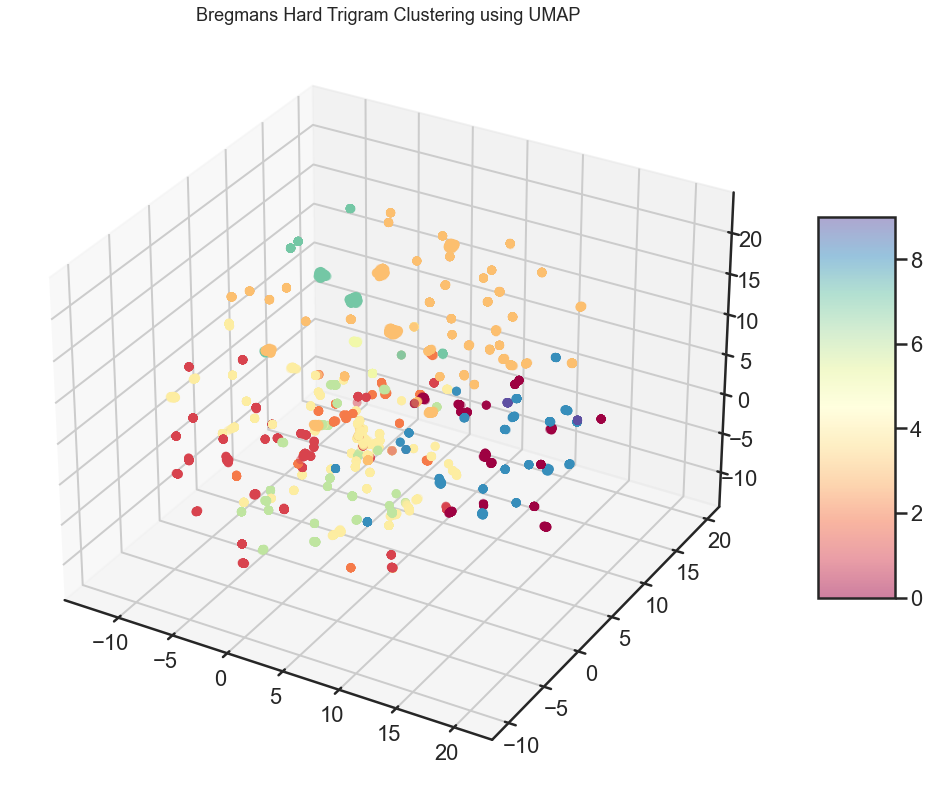

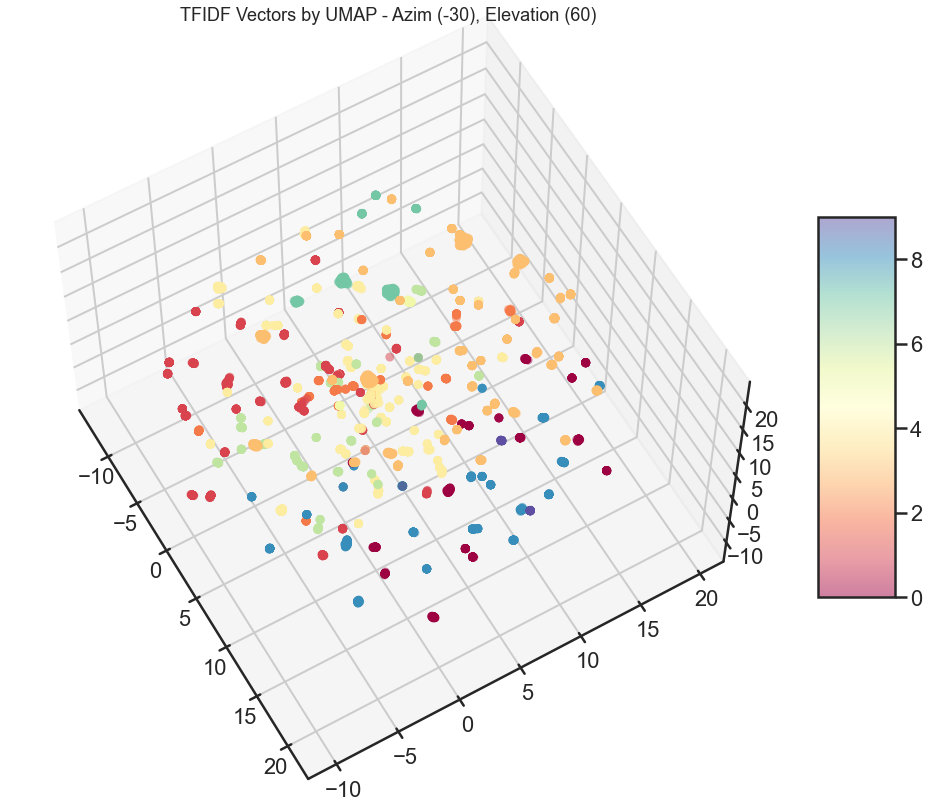

In [72]:
plot_clusters("Bregmans Hard Trigram Clustering using UMAP", X, y_pred)

In [73]:
results = evaluate_clustering('Bregmans Hard Trigram Clustering', X, labels_, y_pred)
print(results)

['Bregmans Hard Bigram Clustering', '0.54', '0.16', '0.24', '0.06', '0.24', '0.37']
